<a href="https://colab.research.google.com/github/marcusvpimentel/Mestrado/blob/main/aula3a_multiclasse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_wine
dataset = load_wine()
X, y = dataset.data, dataset.target
X.shape, y.shape

((178, 13), (178,))

In [2]:
set(y)

{0, 1, 2}

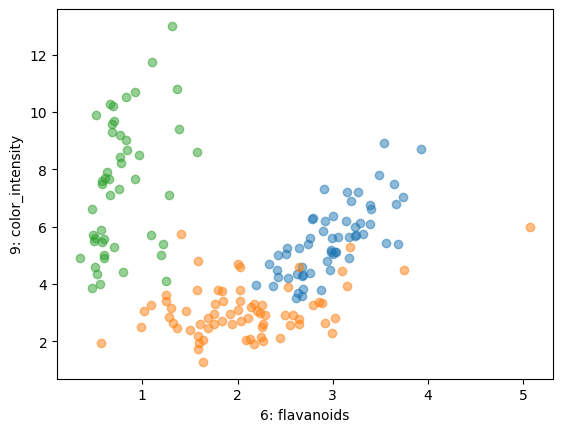

In [3]:
import matplotlib.pyplot as plt
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)
plt.show()

In [4]:
import numpy as np
from sklearn.base import BaseEstimator, ClassifierMixin
class knn(BaseEstimator, ClassifierMixin):
  def fit(self, X, y):
    self.X = X
    self.y = y
  def distancia(self, x):
    diferenca = self.X - x
    quadrado = diferenca**2
    soma = np.sum(quadrado, axis=1)
    raiz = np.sqrt(soma)
    return raiz
  def predict(self, X):
    ypred = np.empty((X.shape[0],))
    for i in range(X.shape[0]):
      distancias = self.distancia(X[i])
      vizinho = np.argmin((distancias))
      ypred[i] = self.y[vizinho]
    return ypred


In [5]:
from sklearn.metrics import accuracy_score
modelo = knn()
modelo.fit(X, y)
accuracy_score(y, modelo.predict(X))

1.0

In [6]:
from sklearn.model_selection import cross_validate
cross_validate(knn(), X, y)

{'fit_time': array([8.39233398e-05, 5.79357147e-05, 5.24520874e-05, 5.45978546e-05,
        5.29289246e-05]),
 'score_time': array([0.0015614 , 0.00148392, 0.00134873, 0.00126505, 0.00123763]),
 'test_score': array([0.80555556, 0.63888889, 0.66666667, 0.68571429, 0.82857143])}

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.3)
modelo = knn()
modelo.fit(Xtr, ytr)
ypred = modelo.predict(Xte)
confusion_matrix(yte, ypred)

array([[16,  0,  1],
       [ 2, 16,  6],
       [ 3,  4,  6]])

In [8]:
from sklearn.metrics import f1_score
f1_score(yte, ypred, average="macro")

0.6769721506563612

In [9]:
sum(y==0), sum(y==1), sum(y==2)

(59, 71, 48)

In [10]:
cross_validate(knn(), X, y, scoring="f1_macro")

{'fit_time': array([7.04050064e-04, 9.84668732e-05, 1.02043152e-04, 6.03199005e-05,
        5.65052032e-05]),
 'score_time': array([0.00387883, 0.00337338, 0.00222063, 0.00213218, 0.00210977]),
 'test_score': array([0.80371184, 0.63163031, 0.65010893, 0.67301587, 0.80277778])}

In [11]:
cross_validate(knn(), X, y, scoring=['precision_macro', 'recall_macro'])

{'fit_time': array([1.24692917e-04, 8.84532928e-05, 9.29832458e-05, 6.17504120e-05,
        6.05583191e-05]),
 'score_time': array([0.00670385, 0.00622058, 0.00545573, 0.0033474 , 0.00315309]),
 'test_precision_macro': array([0.8022533 , 0.64814815, 0.7       , 0.74603175, 0.80903541]),
 'test_recall_macro': array([0.81031746, 0.64444444, 0.64126984, 0.65608466, 0.80740741])}

In [12]:
from sklearn.model_selection import RepeatedStratifiedKFold
cross_validate(knn(), X, y, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'],
               cv=RepeatedStratifiedKFold())

{'fit_time': array([1.17540359e-04, 1.18970871e-04, 6.48498535e-05, 6.07967377e-05,
        5.79357147e-05, 6.31809235e-05, 1.06573105e-04, 9.77516174e-05,
        1.13010406e-04, 8.86917114e-05, 9.63211060e-05, 1.03950500e-04,
        1.04188919e-04, 1.02758408e-04, 1.10626221e-04, 9.20295715e-05,
        1.03235245e-04, 1.18017197e-04, 1.08242035e-04, 9.87052917e-05,
        1.00851059e-04, 1.03473663e-04, 1.00851059e-04, 1.00851059e-04,
        1.03950500e-04, 9.29832458e-05, 1.01804733e-04, 1.02758408e-04,
        1.02519989e-04, 9.96589661e-05, 1.00374222e-04, 9.60826874e-05,
        9.77516174e-05, 1.08957291e-04, 1.02519989e-04, 1.01804733e-04,
        1.30414963e-04, 1.02043152e-04, 8.43143463e-03, 1.04904175e-04,
        1.13725662e-04, 1.07526779e-04, 9.60826874e-05, 1.52826309e-04,
        6.86645508e-05, 6.50882721e-05, 6.50882721e-05, 6.12735748e-05,
        6.27040863e-05, 6.38961792e-05]),
 'score_time': array([0.00878119, 0.00631118, 0.00465727, 0.00461197, 0.00715232,


In [13]:
from sklearn.linear_model import Perceptron
modelos = cross_validate(Perceptron(), X, y,
                        cv=RepeatedStratifiedKFold(random_state=42),
                        return_estimator=True)
modelo = modelos['estimator'][0]
modelo, sum(modelos['test_score'])/50

(Perceptron(), 0.572936507936508)

In [14]:
modelo.intercept_

array([-105.,  114.,   19.])

In [15]:
modelo.coef_[:,[6,9]]

array([[  109.82    ,  -490.499995],
       [  416.45    , -1222.54999 ],
       [ -339.16    ,   929.879991]])

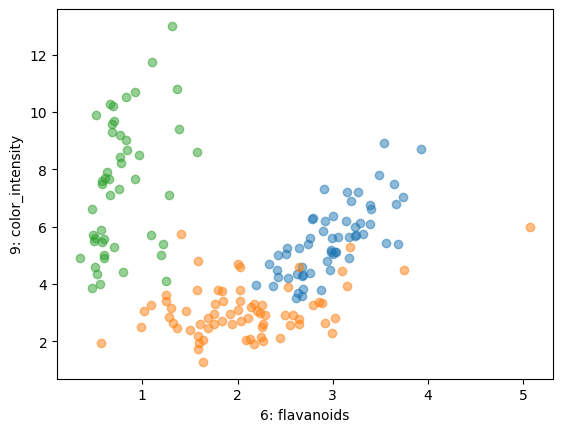

In [16]:
i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
for k in set(y):
  plt.plot(X[:,i][y==k], X[:,j][y==k], "o", alpha=0.5)

plt.show()

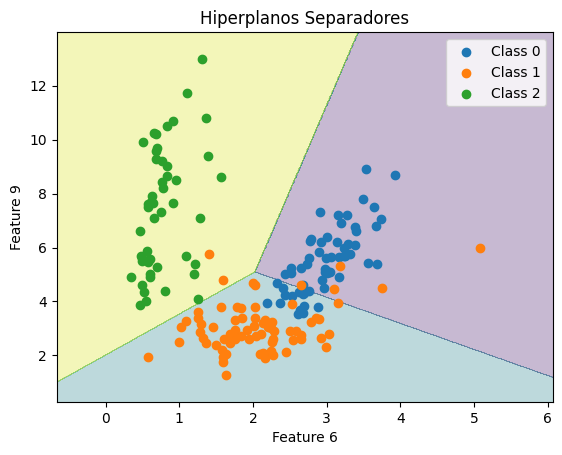

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Seleciona apenas as duas primeiras características para visualização
X69 = X[:, [6, 9]]

modelo.fit(X69, y)

# Determina os limites do gráfico
x_min, x_max = X69[:, 0].min() - 1, X69[:, 0].max() + 1
y_min, y_max = X69[:, 1].min() - 1, X69[:, 1].max() + 1

# Cria uma grade de pontos para a visualização dos hiperplanos
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Calcula as distâncias dos pontos à superfície de decisão
Z = np.c_[xx.ravel(), yy.ravel()]

ypred = modelo.predict(Z)

# Plota os hiperplanos separadores
plt.contourf(xx, yy, ypred.reshape(xx.shape), alpha=0.3)

# Plota os pontos de dados originais
for k in set(y):
    plt.scatter(X69[y == k][:, 0], X69[y == k][:, 1], label=f'Class {k}')

plt.xlabel('Feature 6')
plt.ylabel('Feature 9')
plt.legend()
plt.title('Hiperplanos Separadores')
plt.show()


In [18]:
def plot_hyperplane(X, coef, intercept, column=0, color='black'):
  def line(x0):
    return (-(x0 * coef[0, column]) - intercept[column]) / coef[1, column]
  xmin = min(X[:,0])
  xmax = max(X[:,0])
  plt.plot([xmin, xmax], [line(xmin), line(xmax)], ls="-", color=color)

IndexError: ignored

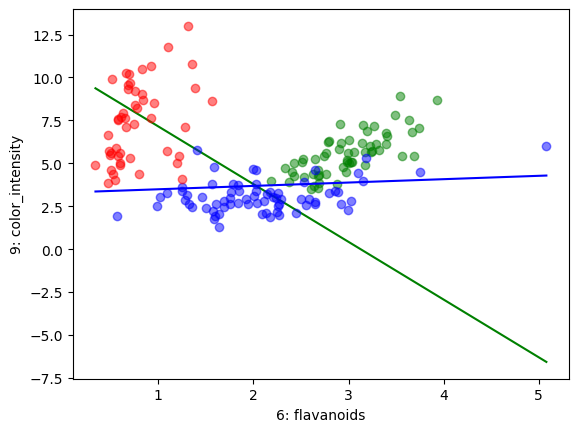

In [36]:
X69 = X[:, [6, 9]]

modelo.fit(X69, y)

i, j = 6, 9
plt.xlabel(f"{i}: {dataset.feature_names[i]}")
plt.ylabel(f"{j}: {dataset.feature_names[j]}")
colors = ['green', 'blue', 'red']

# Determina os limites do gráfico
x_min, x_max = X69[:, 0].min() - 1, X69[:, 0].max() + 1
y_min, y_max = X69[:, 1].min() - 1, X69[:, 1].max() + 1

for k in set(y):
    plt.plot(X69[:, 0][y == k], X69[:, 1][y == k], "o", alpha=0.5, color=colors[k])
    # Calcula o hiperplano para a classe k
    plot_hyperplane(X69, modelo.coef_, modelo.intercept_, column=k, color=colors[k])

plt.show()
